# **Automatidata**


# **Multiple linear regression model**

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model

*This Notebook has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# **PACE stages**


## **PACE: Plan**


### Task 1. Imports and loading

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

ImportError: cannot import name 'mean_absolute_standarizererror' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path_main = '/content/drive/MyDrive/Data Analytics/Main Projects/Automatidata project/2017_Yellow_Taxi_Trip_Data.csv'
df0=pd.read_csv(file_path_main)
df = df0.copy()

## **PACE: Analyze**

Consider the following question:

What are some purposes of EDA before constructing a multiple linear regression model?


1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another. For example, in this dataset a `duration` variable can be created by subtracting `tpep_dropoff` from `tpep_pickup time`.

### Task 2a. Explore data with EDA

Analyzing and discovering data, looking for correlations, missing data, outliers, and duplicates:

In [6]:
df.shape

(22699, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
df.isna().sum().sum()

0

In [9]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [10]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"],format='%m/%d/%Y %I:%M:%S %p')
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"],format='%m/%d/%Y %I:%M:%S %p')

In [11]:
df["tpep_pickup_datetime"].dtype

dtype('<M8[ns]')

In [12]:
df["tpep_pickup_datetime"][0]

Timestamp('2017-03-25 08:55:43')

### Task 2c. Create duration column

Creating a new column called `duration` in minutes that represents the total number of minutes that each taxi ride took:

In [13]:
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df["duration"][:2]

0    14.066667
1    26.500000
Name: duration, dtype: float64

### Outliers

Calling `df.info()` to inspect the columns and decide which ones to check for outliers:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit the model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plotting a box plot for each feature: `trip_distance`, `fare_amount`, `duration`:

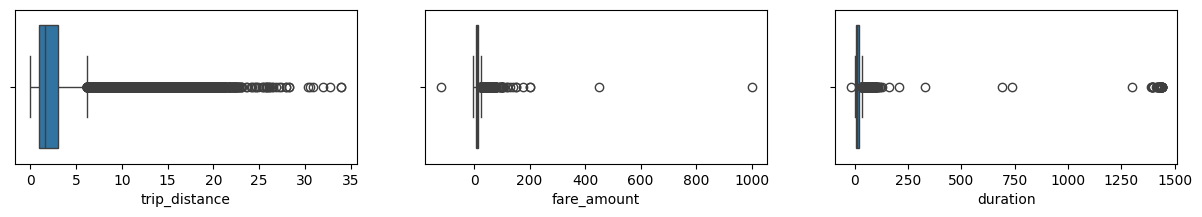

In [15]:
fig,axes = plt.subplots(1,3,figsize=(15,2))
sns.boxplot(x=df["trip_distance"],ax=axes[0])
sns.boxplot(x=df["fare_amount"],ax=axes[1])
sns.boxplot(x=df["duration"],ax=axes[2])
plt.show()

**Questions:**


Which variable(s) contains outliers?

* All three variables contain outliers. Some are extreme, but others not so much.

Are the values in the `trip_distance` column unbelievable?

* It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

* Probably not for the latter two, but for `trip_distance` it might be okay.

### Task 2e. Imputations

#### `trip_distance` outliers

It's know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?


In [16]:
sorted(set(df["trip_distance"]))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculating the count of rides where the `trip_distance` is zero:

In [17]:
sum(df["trip_distance"]==0)

148

#### `fare_amount` outliers

In [18]:
df["fare_amount"].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

Imputing values less than $0 with `0`:

In [19]:
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Imputing the maximum value as `Q3 + (6 * IQR)`:

In [20]:
def outlier_computer(column_list,IQR_factor):
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        IQR = q3-q1
        upper_limit = q3 + IQR_factor*IQR

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_limit, col] = upper_limit
        print("Column: ",col)
        print("Upper limit: ", upper_limit)
        print(df[col].describe())

In [21]:
outlier_computer(["fare_amount"],6)

Column:  fare_amount
Upper limit:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [22]:
df["duration"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [23]:
outlier_computer(["duration"],6)

Column:  duration
Upper limit:  88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Creating `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones you we not know.

In this step, we are creating a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


We'll begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


Creating a pickup_dropoff column:

In [24]:
df["pickup_dropoff"] = df["PULocationID"].astype("str") +" "+ df["DOLocationID"].astype("str")
df["pickup_dropoff"].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Grouping each row by the new `pickup_dropoff` column, computing the mean, and capturing the values only in the `trip_distance` column. Assigning the results to a variable named `grouped`:

In [26]:
grouped = df.groupby("pickup_dropoff")["trip_distance"].mean()
grouped[:5]

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
Name: trip_distance, dtype: float64

Convert `grouped` to a dictionary

In [27]:
grouped_dict = grouped.to_dict()

Creating a mean_distance column:

In [28]:
df["mean_distance"] = df["pickup_dropoff"].map(grouped_dict)

df[df["pickup_dropoff"]=="100 231"][["pickup_dropoff","mean_distance"]]

,pickup_dropoff,mean_distance
0,100 231,3.521667
4909,100 231,3.521667
16636,100 231,3.521667
18134,100 231,3.521667
19761,100 231,3.521667
20581,100 231,3.521667


#### Create `mean_duration` column

Repeating the process used to create the `mean_distance` column to create a `mean_duration` column:

In [29]:
grouped_2 = df.groupby("pickup_dropoff")["duration"].mean()
grouped_2 = grouped_2.to_dict()
df["mean_duration"] = df["pickup_dropoff"].map(grouped_2)
df[df["pickup_dropoff"] == "1 1"][["pickup_dropoff","mean_duration"]]

,pickup_dropoff,mean_duration
3582,1 1,0.466667
6485,1 1,0.466667
13359,1 1,0.466667


#### Create `day` and `month` columns

Creating two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [30]:
df["day"] = df["tpep_pickup_datetime"].dt.day_name().str.lower()

df["month"] = df["tpep_pickup_datetime"].dt.month_name().str.lower()
df.head(1)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,march


#### Create `rush_hour` column

Defining rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00


In [34]:
def hours_generator(limits_list):
  """Returns a list of hours within two 2 ranges"""
  return [i for i in range(limits_list[0],limits_list[1])] + [i for i in range(limits_list[2],limits_list[3])]

df["rush_hour"] =  np.where(df["tpep_pickup_datetime"].dt.hour.isin(hours_generator([6,10,16,20])), 1, 0)

# If day is Saturday or Sunday, imputing 0 in `rush_hour` column
df.loc[df["day"].isin(["saturday","sunday"]),"rush_hour"] = 0
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,march,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,april,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,december,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,april,0


### Task 4. Scatter plot

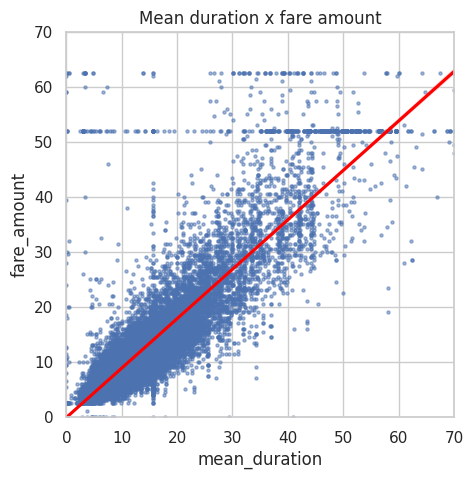

In [35]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Checking the value of the rides in the second horizontal line in the scatter plot.

In [ ]:
df[df["fare_amount"] > 50]["fare_amount"].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

There are 514 trips whose fares were \$52.

In [36]:
pd.set_option('display.max_columns', None)
df[df["fare_amount"] == 52.0].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,march,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,june,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,november,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,december,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,september,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,february,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,june,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,august,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,september,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,april,0


**Question:** What do you notice about the first 30 trips?

It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way we know that those data points will always be correct.

### Task 5. Isolate modeling variables


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [38]:
df2 = df[["VendorID","passenger_count","fare_amount","mean_distance","mean_duration","rush_hour"]]

### Task 6. Pair plot

Creating a pairplot to visualize pairwise relationships between variables in the data:

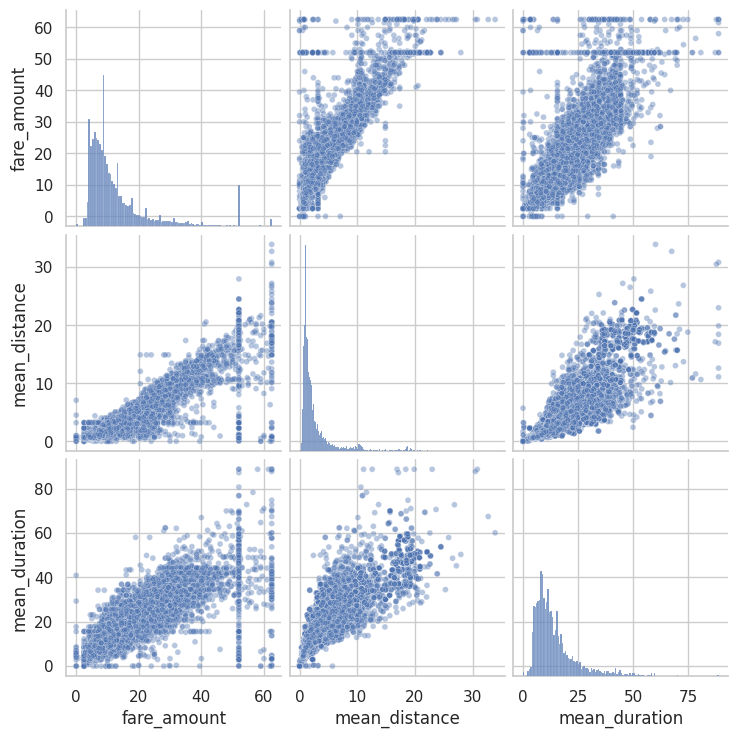

In [39]:
sns.pairplot(df2[["fare_amount","mean_distance","mean_duration"]],
            plot_kws={'alpha':0.4, 'size':5})

These variables all show linear correlation with each other.

### Task 7. Identify correlations

Correlation matrix to help determine most correlated variables:

In [40]:
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


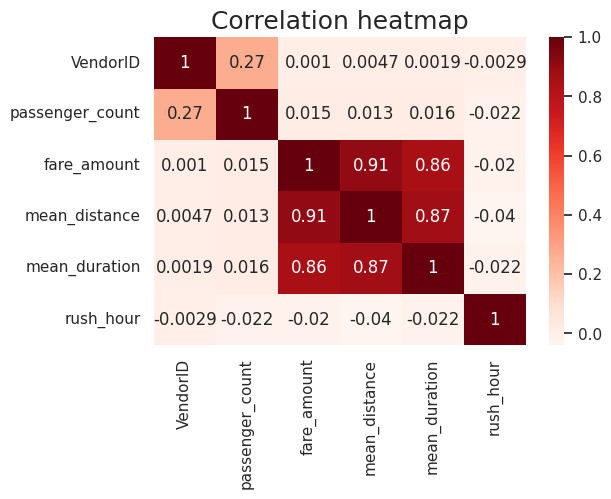

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`?

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, it will be modeling with both variables even though they are correlated.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.


### Task 8a. Split data into outcome variable and features

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [43]:
X = df2.drop(columns=['fare_amount'])

y = df[["fare_amount"]]

### Task 8b. Pre-process data


Getting dummies:

In [44]:
X = pd.get_dummies(X,columns=["VendorID"],drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Method 1: OLS Formula

In [46]:
from statsmodels.formula.api import ols

ols_formula = "fare_amount ~ passenger_count + mean_distance + mean_duration + C(rush_hour) + C(VendorID_2)"
ols_data = pd.concat([x_train,y_train],axis=1)
OLS  = ols(formula= ols_formula,data=ols_data)
model1 = OLS.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.904e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:57:07   Log-Likelihood:                -51954.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18153   BIC:                         1.040e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.0107      0.080     37.456      0.000       2.853       3.168
C(rush_hour)[T.1]      0.2414      0.069      3.506      0.000       0.106       0.376
C(VendorID_2)[T.1]    -0.1094      0.066     -1.669      0.095      -0.238       0.019
passenger_count        0.0239      0.025      0.946      0.344      -0.026       0.074
mean_distance          1.9956      0.018    110.286      0.000       1.960       2.031
mean_duration          0.2784      0.006     43.499      0.000       0.266       0.291
==============================================================================
Omnibus:                    21369.135   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3406295.176
Skew:                           6.142   Prob(JB):                         0.00
Kurtosis:                      68.963   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model1.params

Intercept             3.010729
C(rush_hour)[T.1]     0.241401
C(VendorID_2)[T.1]   -0.109446
passenger_count       0.023930
mean_distance         1.995647
mean_duration         0.278431
dtype: float64

### Train model

Calculating the train model predicted values:

In [48]:
y_pred_train_1 = model1.fittedvalues
df_combined = pd.DataFrame({'Observed': np.array(y_train).flatten(),'Predictions': np.array(y_pred_train_1)})
df_combined.head()

,Observed,Predictions
0,19.5,19.454232
1,4.5,6.752747
2,6.5,7.866071
3,5.0,6.897026
4,7.5,6.816489


In [49]:
print('R^2:', model1.rsquared)
print('MAE:', mean_absolute_error(y_train, y_pred_train_1))
print('MSE:', mean_squared_error(y_train, y_pred_train_1))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train_1)))

R^2: 0.8398434585044773
MAE: 2.186666416775415
MSE: 17.88973296349268
RMSE: 4.229625629236313


### Interpretation

* Intercept (3.010729): The intercept represents the estimated fare amount when all other predictor variables are zero or non-applicable. In this case, when all categorical variables are at their reference levels (e.g., rush_hour and VendorID_2 are at their base categories), the estimated fare amount is approximately $3.01.

* C(rush_hour)[T.1] (0.241401): When the trip occurs during rush hour (assuming 1 represents rush hour and 0 is non-rush hour), the fare amount is estimated to increase by approximately $0.24 compared to non-rush hour trips, controlling for other variables.

* C(VendorID_2)[T.1] (-0.109446): For trips associated with VendorID 2 (if this is a categorical variable and 1 represents a specific vendor), the fare amount is estimated to decrease by approximately $0.11 compared to trips associated with VendorID 1, controlling for other variables.

* passenger_count (0.023930): For each additional passenger in the trip, the fare amount is estimated to increase by approximately $0.02, controlling for other variables.

* mean_distance (1.995647): For every mile traveled (given mean_distance is in miles), the fare amount is estimated to increase by approximately $1.99, controlling for other variables.

* mean_duration (0.278431): For each additional minute of trip duration, the fare amount is estimated to increase by approximately $0.28, controlling for other variables

### Test data

In [71]:
y_test_pred = model1.predict(x_test)

In [72]:
print('R^2:', model1.rsquared)
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.8398434585044773
MAE: 2.1336549840593877
MSE: 14.326454156998945
RMSE: 3.785030271609323


In [87]:
results_method_1 = pd.DataFrame(data = {"real":y_test.values.flatten(),"predicted":y_test_pred.values.flatten()})
results_method_1.head()

,real,predicted
0,14.0,12.356503
1,28.0,16.314595
2,5.5,6.726789
3,15.5,16.227206
4,9.5,10.536408


### Method 2: Standardizing the data and using LinearRegression()

In [50]:
standarizer = StandardScaler().fit(x_train)
x_train_standard = standarizer.transform(x_train)

### Fit the model

Instantiate the model and fitting it to the training data:

In [51]:
model2 = LinearRegression()
model2.fit(x_train_standard, y_train)
model2

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluating the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error:

In [52]:
# Evaluating the model performance on the training data
r_sq = model2.score(x_train_standard, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.8398434585044773


In [53]:
# Calculate the train model predicted values
y_pred_train_2 = model2.predict(x_train_standard)

In [56]:
print('R^2:', r2_score(y_train, y_pred_train_2))
print('MAE:', mean_absolute_error(y_train, y_pred_train_2))
print('MSE:', mean_squared_error(y_train, y_pred_train_2))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train_2)))

R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


### Test data

Calculate the same metrics on the test data.

In [57]:
x_test_standard = standarizer.transform(x_test)

In [58]:
y_pred_test_2 = model2.predict(x_test_standard)

print('R^2:', r2_score(y_test, y_pred_test_2))
print('MAE:', mean_absolute_error(y_test, y_pred_test_2))
print('MSE:', mean_squared_error(y_test, y_pred_test_2))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998942
RMSE: 3.7850302716093225


## PACE: **Execute**


### Task 9a. Results


In [59]:
data = {"actual":y_test["fare_amount"], "predicted":y_pred_test_2.flatten()}
results = pd.DataFrame(data = data)
results["residuals"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residuals
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Task 9b. Visualize model results

Creating a scatterplot to visualize `actual` vs. `predicted`:

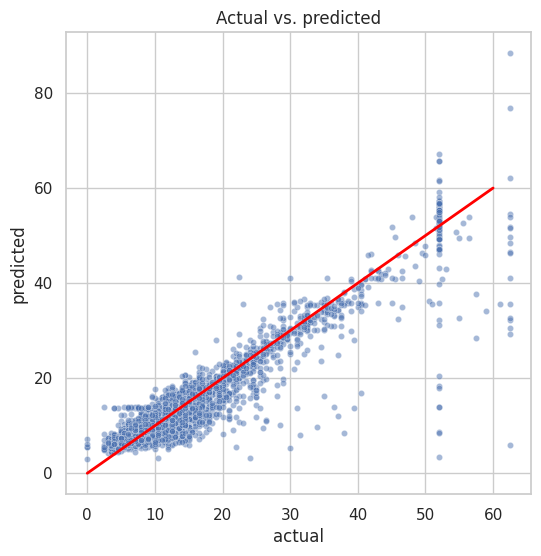

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualizing the distribution of the `residuals` using a histogram:

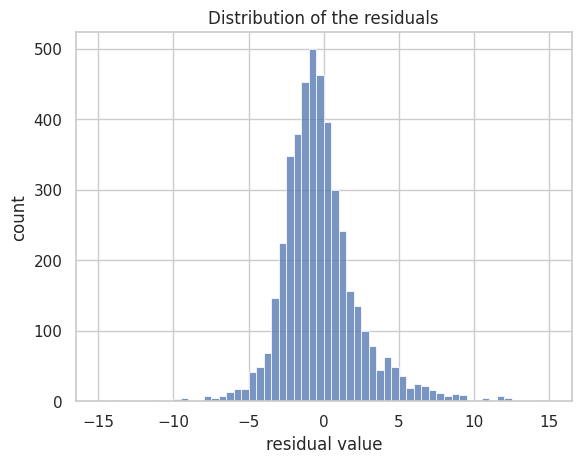

In [61]:
sns.histplot(results['residuals'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [62]:
results['residuals'].mean()

-0.01544262152868054

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Creating a scatterplot of `residuals` over `predicted`:

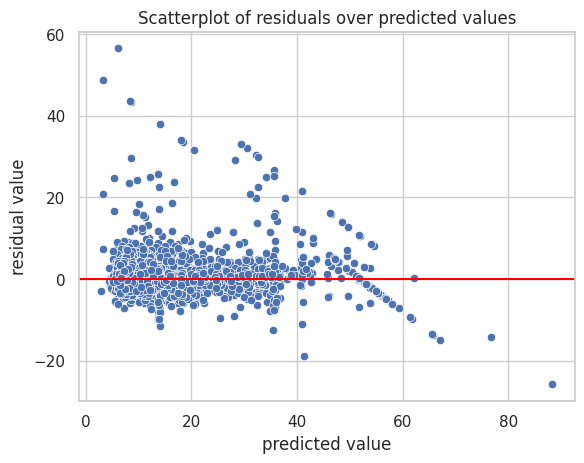

In [63]:
sns.scatterplot(x = results["predicted"] , y = results["residuals"])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

### Task 9c. Coefficients

Using the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [64]:
coefficients = pd.DataFrame(data= model2.coef_, columns= X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


What do these coefficients mean? How should they be interpreted?

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

In [65]:
# 1. Calculate SD of `mean_distance` in x_train data
print(x_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / x_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


For every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.

### Task 9d. Conclusion

**What are the key takeaways from this notebook?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).

**What results can be presented from this notebook?**

*  We can discuss meeting linear regression assumptions, and present the MAE and RMSE scores obtained from the model.

### BONUS:

1. Get the model's predictions on the full dataset.

2. Impute the constant fare rate of \$52 for all trips with rate codes of `2`.

3. Check the model's performance on the full dataset.

4. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.

### 1. Predict on full dataset

In [66]:
X_standard = standarizer.transform(X)
y_preds_full = model2.predict(X_standard)
y_preds_full

array([[16.43424469],
       [16.05221769],
       [ 7.05370619],
       ...,
       [ 6.13089642],
       [11.70704878],
       [ 8.60096886]])

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes have some variation. They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [67]:
# Creating a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Adding a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full
final_preds

,RatecodeID,y_preds_full
0,1,16.434245
1,1,16.052218
2,1,7.053706
3,1,18.731650
4,1,15.845642
...,...,...
22694,1,7.799138
22695,2,56.942034
22696,1,6.130896
22697,1,11.707049


In [68]:
# Imputing a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52
# Checking that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [69]:
final_preds = final_preds["y_preds_full"]
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


### Save final predictions with `mean_duration` and `mean_distance` columns

In [70]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
